# Tutorial 4
# Linear Models

In [1]:
%matplotlib inline
from preamble import *

import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

# Predictions of a linear model on the wave dataset

w[0]: 0.393906  b: -0.031804


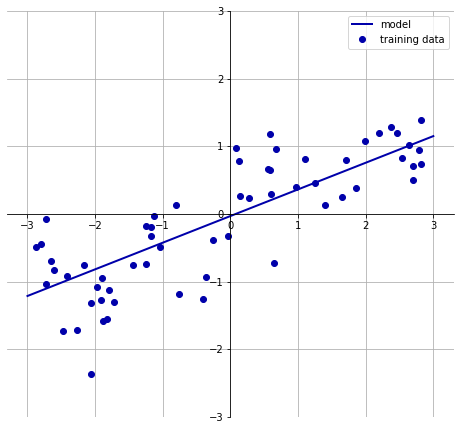

In [2]:
# plot regression line based on the wave dataset
mglearn.plots.plot_linear_regression_wave()

In [3]:
# import the libraries for LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [4]:
# X and y are the array variables that store the independent and dependent variables
X, y = mglearn.datasets.make_wave(n_samples = 60)

# Call the train_test_split method to split the data and the default splitting is 75% for training and 25% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

# Train the LinearRegression mode by using a method fit() function/ method
lr = LinearRegression().fit(X_train, y_train)

In [5]:
# Display the coefficient and intercept values
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [0.394]
lr.intercept_: -0.031804343026759746


In [6]:
# Display the score values by calling lr
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.67
Test set score: 0.66


#### As R^2 of around 0.66 is not very good, but we can see that the scores on the training and test sets are very close together. This means we are likely underfitting, not overfitting.
#### For this one-dimensional dataset, there is little danger of overfitting, as the model is very simple (or restricted). However, with higher-dimensional datasets (meaning datasets with a large number of features), linear models become more powerful, and there is a higher chance of overfitting.

In [7]:
# Store and load the dataset 
X, y = mglearn.datasets.load_extended_boston()
X.shape, y.shape

((506, 104), (506,))

In [8]:
# Split the dataset by using train_test_splitting to 25% and 75% for training
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Use LinearRegression() model to train the data
lr = LinearRegression().fit(X_train, y_train)

In [9]:
# Display the score using format function
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))
# OVERFITTED MODEL

Training set score: 0.95
Test set score: 0.61


In [26]:
lr.coef_, lr.intercept_

(array([ -412.711,   -52.243,  -131.899,   -12.004,   -15.511,    28.716,
           54.704,   -49.535,    26.582,    37.062,   -11.828,   -18.058,
          -19.525,    12.203,  2980.781,  1500.843,   114.187,   -16.97 ,
           40.961,   -24.264,    57.616,  1278.121, -2239.869,   222.825,
           -2.182,    42.996,   -13.398,   -19.389,    -2.575,   -81.013,
            9.66 ,     4.914,    -0.812,    -7.647,    33.784,   -11.446,
           68.508,   -17.375,    42.813,     1.14 ,    -0.773,    56.826,
           14.288,    53.955,   -32.171,    19.271,   -13.885,    60.634,
          -12.315,   -12.004,   -17.724,   -33.987,     7.09 ,    -9.225,
           17.198,   -12.772,   -11.973,    57.387,   -17.533,     4.101,
           29.367,   -17.661,    78.405,   -31.91 ,    48.175,   -39.534,
            5.23 ,    21.998,    25.648,   -49.998,    29.146,     8.943,
          -71.66 ,   -22.815,     8.407,    -5.379,     1.201,    -5.209,
           41.145,   -37.825,    -2.67

## Ridge regression

In [10]:
from sklearn.linear_model import Ridge

# Train the Ridge() mode by calling a fit() method
ridge = Ridge().fit(X_train, y_train)

# Display the score by using ridge object
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


In [21]:
# alpha = 10 is a parameter using a fit() method
ridge10 = Ridge(alpha = 10).fit(X_train, y_train)

# Display the score values for Ridge function
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64


In [22]:
# alpha = 0.1 is a parameter using a fit() method
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)

# Display the score values for Ridge function
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.77


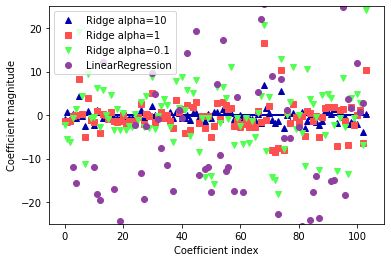

In [24]:
# Use plot function for different labels
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")
plt.plot(lr.coef_, 'o', label="LinearRegression")

# Use x and y labels for the plot
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

In [27]:
ridge01.coef_, ridge01.intercept_

(array([ -2.333,  -5.442,  -6.129,  -0.779,   1.292,  19.022,   4.359,
        -11.191,   9.555,  -0.749,  -0.533,   6.234,  -2.729,   5.861,
          0.023,  -0.902,   4.668,  -3.38 ,   1.316,  -3.489,   0.442,
         -3.519,  -2.522,  -2.696,   0.245,  -1.023,   3.042,  -2.688,
          4.284,  -2.941,   8.709,  -3.137,  -0.292,   2.175,   3.627,
          2.3  ,  -2.838,  -6.172,   7.949,   1.656,   8.728,   1.08 ,
          5.722,  -4.764,   5.075,   8.016,  -8.443,  -0.645, -14.229,
         -0.779, -13.898, -15.93 ,   6.426,  -1.853,   6.379,   4.031,
         -0.948,  11.113,  -6.976,  -0.672,  -2.578,  -6.757,  -0.665,
         -6.518,  -1.394,  -5.012,   0.495,   4.285,  20.793,  -8.256,
          4.234, -14.215, -15.004, -18.148,  12.986,  -7.815,   0.042,
          2.98 ,  11.164,  -3.157,  -0.034,  -4.166, -11.603,  10.634,
          3.7  ,   2.575,  -0.491, -12.536,   4.664,  -4.68 ,   4.821,
          3.909,  -2.356, -12.878,  -0.779,   8.565,  -2.85 , -13.458,
      

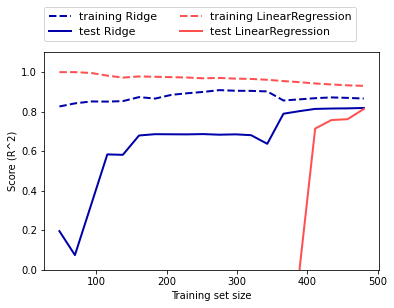

In [14]:
# Display the training and testing for the Linear and Ridge regression
mglearn.plots.plot_ridge_n_samples()

### Lasso Regression

In [28]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.29
Test set score: 0.21
Number of features used: 4


In [31]:
lasso.coef_

array([-0.   ,  0.   , -0.   ,  0.   , -0.   ,  0.   , -0.   ,  0.   ,
       -0.   , -0.   , -0.   ,  0.   , -5.353, -0.   ,  0.   , -0.   ,
        0.   , -0.   , -0.   , -0.   , -0.   , -0.   , -0.   , -0.   ,
       -0.   , -0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   , -0.   ,  0.   ,
       -0.   , -0.   , -0.   , -0.   , -0.   , -0.   , -0.   , -0.   ,
       -0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   , -0.   , -0.   , -0.   , -0.   , -0.   , -0.   ,
       -0.   , -0.   , -0.   , -0.   ,  0.   ,  0.   ,  0.   , -0.   ,
       -0.   , -0.   ,  0.   , -0.   , -0.   ,  0.   , -0.   , -1.051,
       -3.31 , -0.   , -0.   ,  0.   , -0.   , -0.   , -0.   ,  0.   ,
       -0.   , -0.414, -0.   , -0.   , -0.   , -0.   , -0.   , -0.   ,
       -0.   , -0.   , -0.   , -0.   , -0.   ,  0.   , -0.   , -0.   ])

In [33]:
# we increase the default setting of "max_iter",
# otherwise the model would warn us that we should increase max_iter.
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.90
Test set score: 0.77
Number of features used: 33


In [34]:
lasso001.coef_

array([ -0.   ,  -0.   ,  -0.   ,   0.   ,  -0.   ,   0.   ,  -0.   ,
        -1.433,  10.948,   0.   ,   0.   ,   0.   ,  -0.393,  -0.   ,
        -0.   ,  -0.   ,   0.   ,  -0.   ,  -0.   ,  -0.   ,  -0.   ,
        -8.756,  -0.   ,  -0.   ,  -0.   ,  -0.   ,   2.1  ,  -0.   ,
         0.   ,  -0.   ,   0.   ,  -0.   ,   0.   ,   0.   ,  -0.   ,
         0.   ,  -0.   ,  -0.   ,   0.   ,   0.   ,   0.   ,  -0.   ,
         0.   ,  -3.97 ,   0.   ,   6.618,  -0.   ,  -0.   ,  -0.   ,
         0.   ,  -4.421,  -2.104,   3.796,  -0.   ,   4.386,   0.   ,
         0.   ,   0.18 ,  -0.   ,  -1.161,  -4.335,  -0.   ,  -0.   ,
        -2.135,  -0.   ,  -1.86 ,  -0.   ,  -0.   ,  29.82 ,  -2.056,
         0.   , -11.98 , -11.149, -11.671,  12.974, -10.931,  -0.   ,
        -0.   ,   3.442,   0.   ,  -0.   ,  -0.   ,  -8.568,   0.   ,
         0.   ,  -0.   ,   0.   ,  -7.261,  -0.   ,   0.   ,   0.943,
         0.   ,   0.   ,  -7.626,   1.653,   0.   ,   0.   , -17.395,
         0.   ,   0.

In [35]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))

Training set score: 0.95
Test set score: 0.64
Number of features used: 96


In [36]:
lasso00001.coef_

array([ -0.   , -22.211, -85.046,  -8.849,  -3.297,  38.036,  47.923,
       -37.997,  27.822,   0.   ,  -0.757,   2.598, -11.085,  10.063,
         0.   ,   0.   , 113.252, -16.711,  27.753, -30.516,   0.   ,
       -10.127,  -0.   ,  -0.   ,  -0.398,  30.328,  -8.176, -14.171,
        -2.246, -52.416,   7.096,   2.495,  -7.199,  -2.946,  25.844,
        -5.141,  33.25 , -12.651,  30.355,  -1.087,  18.272,  47.61 ,
        12.471,  41.798,  -0.   ,  19.741,  -7.426,  19.563, -12.939,
       -15.31 , -16.59 , -31.239,   8.1  ,  -3.22 ,   9.125,  -3.811,
        -8.056,  51.902, -17.475,  -4.004,  19.982, -15.901,  44.807,
       -11.986,  17.283, -34.277,   4.136,  13.971,  22.194, -47.204,
        18.707,   4.901, -59.773, -26.12 ,   8.603,  -4.903,   0.49 ,
        -1.708,  38.358, -30.9  ,  -1.453, -22.223, -31.154,  42.685,
        -6.322,  -7.975, -13.741, -21.993,  23.499, -89.074, 111.107,
        -8.986, -25.924, -24.601, -20.438,  20.673,  12.86 ,  -0.705,
         3.509,  19.

Text(0, 0.5, 'Coefficient magnitude')

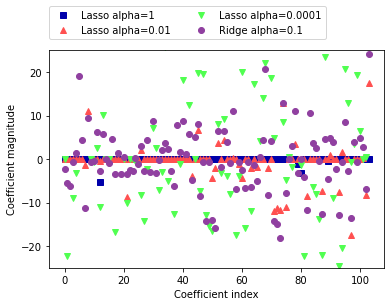

In [40]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")
plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

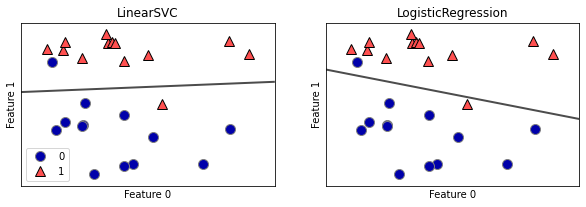

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
    axes[0].legend()

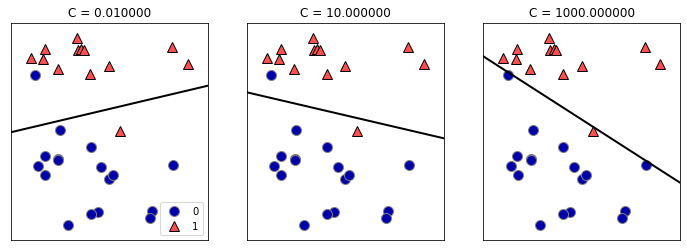

In [43]:
mglearn.plots.plot_linear_svc_regularization()

# Cross-Validation: A Quick Recap
The following figure illustrates k-fold cross-validation with k=4. There are some other schemes to divide the training set, we'll look at them briefly later.

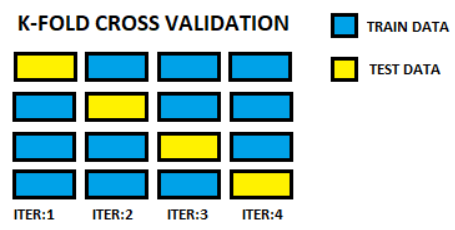

In [22]:
from IPython.display import Image
Image(filename =r'Im1.png')

In [44]:
# Store and load the dataset 
X, y = mglearn.datasets.load_extended_boston()

# Split the dataset by using train_test_splitting to 25% and 75% for training
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

# Use LinearRegression() model to train the data
lr = LinearRegression().fit(X_train, y_train)

In [54]:
X.shape, y.shape, X_train.shape, y_train.shape, X_test.shape, y_test.shape

((506, 104), (506,), (379, 104), (379,), (127, 104), (127,))

In [52]:
from sklearn.linear_model import ElasticNet

regr = ElasticNet(random_state=0)

elasticNet = regr.fit(X, y)

elasticNet.coef_

array([-0.   ,  0.014, -0.301,  0.   , -0.053,  0.391, -0.07 ,  0.   ,
       -0.16 , -0.434, -0.473,  0.   , -0.922, -0.   ,  0.   , -0.   ,
        0.   , -0.   , -0.   , -0.   , -0.   , -0.   , -0.   , -0.   ,
       -0.   , -0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.002,  0.   , -0.   ,  0.   ,
       -0.   , -0.   , -0.289, -0.   , -0.   , -0.095, -0.229, -0.   ,
       -0.233,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   , -0.   , -0.   , -0.   , -0.108, -0.   , -0.   ,
       -0.077, -0.104, -0.   , -0.129,  0.704,  0.   ,  0.   , -0.   ,
       -0.   , -0.   ,  0.804, -0.   , -0.335, -0.   , -0.241, -0.48 ,
       -0.673, -0.   , -0.795,  0.   , -0.   , -0.   , -0.   ,  0.   ,
       -0.   , -0.374, -0.316, -0.169, -0.   , -0.275, -0.393, -0.385,
       -0.   , -0.396, -0.561, -0.   , -0.526,  0.046, -0.372, -0.242])

In [57]:
print(regr.predict(X_test))


[24.962 19.44  23.787 18.263 23.451 23.35  20.551 23.847 23.72  22.175
 18.029 18.207 18.657 17.058 24.632 26.024 20.465 26.446 25.3   24.199
 24.166 23.137 22.134 25.142 24.615 18.413 22.307 22.56  25.327 22.309
 18.737 19.34  23.432 24.299 24.32  19.029 17.625 19.653 18.943 18.079
 25.064 24.424 24.607 18.535 24.747 24.282 23.975 22.836 21.322 22.846
 22.949 23.247 23.84  25.773 20.351 24.536 24.724 23.798 18.985 22.74
 24.715 23.747 25.629 25.19  20.117 25.486 18.771 23.465 18.508 24.395
 23.071 23.854 25.597 25.243 20.631 17.14  25.19  24.079 24.54  22.722
 25.1   20.926 18.944 25.071 25.16  24.546 24.207 19.738 23.519 18.996
 22.909 18.113 25.354 25.579 23.024 24.24  15.94  25.355 18.797 23.283
 24.498 22.128 23.966 24.349 24.812 24.387 17.74  18.797 23.048 25.23
 24.067 17.667 23.458 22.814 22.368 23.612 17.155 21.209 17.535 26.942
 25.539 17.693 23.799 22.996 23.567 22.122 24.916]


In [45]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# k-fold CV (using all variables)
scores = cross_val_score(lr, X_train, y_train, scoring = 'r2', cv = 10)
print(scores)

[0.926 0.812 0.759 0.634 0.606 0.357 0.806 0.886 0.918 0.934]


### Reference: 
- Chapter 2, Introduction to Machine Learning with Python A Guide for Data Scientists, Andreas C. Müller and Sarah Guido, Copyright © 2017, O'Reilly.
- https://www.kaggle.com/